gstiff
[[    4666.66666667        0.            -7000.            -4666.66666667
         0.            -7000.                0.                0.
         0.                0.                0.                0.        ]
 [       0.          1400000.                0.                0.
  -1400000.                0.                0.                0.
         0.                0.                0.                0.        ]
 [   -7000.                0.            14000.             7000.
         0.             7000.                0.                0.
         0.                0.                0.                0.        ]
 [   -4666.66666667        0.             7000.          1054666.66666667
         0.             7000.         -1050000.                0.
         0.                0.                0.                0.        ]
 [       0.         -1400000.                0.                0.
   1401968.75           3937.5               0.            -1968.75
      3937.5   

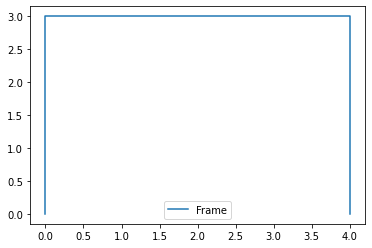

Axial force in 1st element is -[8.58651826] 


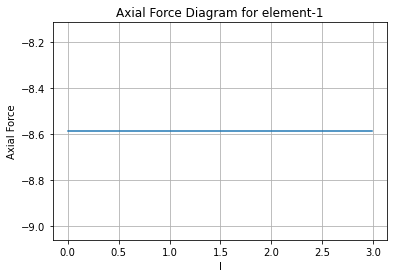

Axial force in 2nd element is -[12.18970737]+20 


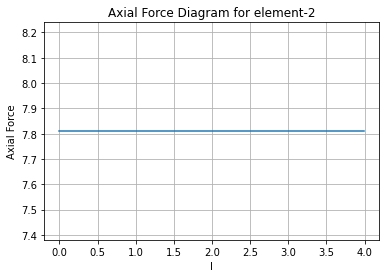

Axial force in 3rd element is -[-8.58651826] 


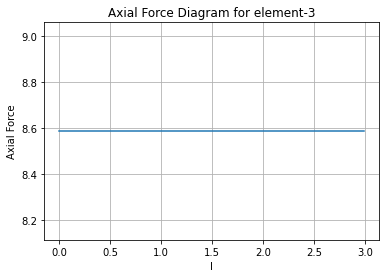

Shear force in 1st element is -[12.18970737] 


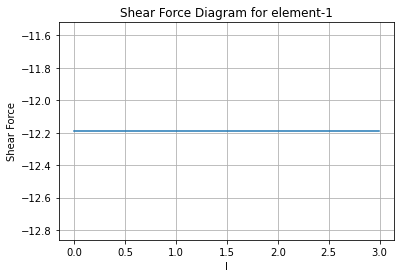

Shear force in 2nd element is [8.58651826] 


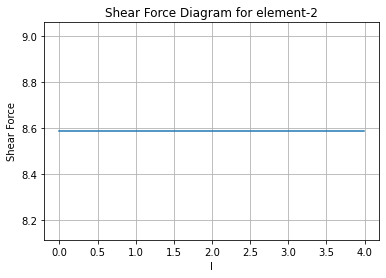

Shear force in 3rd element is -[7.81029263] 


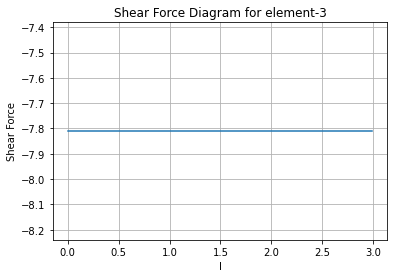

Bending moment in 1st element is -[-21.02534895]-[12.18970737]*x 


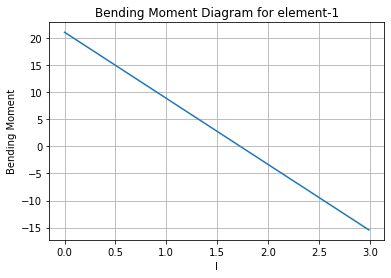

Bending moment in 2nd element is -[-21.02534895]-[12.18970737]*3+[8.58651826]*x 


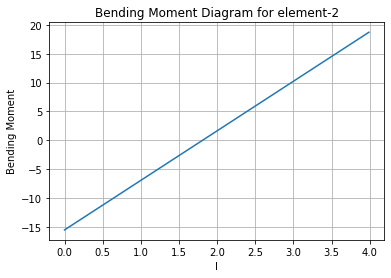

Bending moment in 3rd element is [-21.02534895]-[12.18970737]*3+[8.58651826]*4-12+[12.18970737]*x 


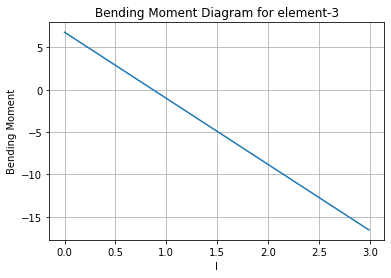

In [2]:
import numpy as np
import math as mt
ndcon= np.array([[1,2],[2,3],[3,4]])
nelem = len(ndcon)
ndofn=3
nnode=2
x=[0,0,4,4]
y=[0,3,3,0]
E=210e6
I=50e-6
A=0.02
L=3
nodes=len(x)
tdofs=nodes*ndofn
gstiff = np.zeros([tdofs,tdofs])
ielem=0
while ielem < 3:   
    x1 =x[ndcon[ielem][0]-1]
    x2 =x[ndcon[ielem][1]-1]
    y1 =y[ndcon[ielem][0]-1]
    y2 =y[ndcon[ielem][1]-1]
    gbdof=[]
    L = mt.sqrt((x2-x1)**2+(y2-y1)**2)
    C =(x2-x1)/L
    S = (y2-y1)/L
    Ri=np.array([[C,S,0 ],           
    [-S,C,0],
    [0,0,1]]);
    #print(Ri)
    b=np.zeros([3,3])
    c=np.concatenate((Ri,b),axis=1)
    d=np.concatenate((b,Ri),axis=1)
    Rt=np.concatenate((c,d,),axis=0)
    K1 =np.matrix('%s, %s , %s, %s, %s, %s; %s, %s , %s, %s, %s, %s; %s, %s , %s, %s, %s, %s; %s, %s, %s, %s, %s, %s; %s, %s, %s, %s, %s, %s; %s, %s, %s, %s, %s, %s' % (A*E/L,0,0,-A*E/L,0,0,0,12*E*I/L**3, 6*E*I/L**2,0,-12*E*I/L**3,6*E*I/L**2,0,6*E*I/L**2,4*E*I/L,0,-6*E*I/L**2,2*E*I/L,-A*E/L,0,0,A*E/L,0,0,0,-12*E*I/L**3,-6*E*I/L**2,0,12*E*I/L**3,-6*E*I/L**2,0,6*E*I/L**2,2*E*I/L,0,-6*E*I/L**2,4*E*I/L))
    KT=np.transpose(Rt).dot(K1).dot(Rt)
    #print("KT is %s" %(KT))
    inode =0
    while inode < nnode:
        idofn=1
        while idofn <= ndofn:
            gbdof.append((ndcon[ielem,inode]-1)*ndofn+idofn)
            idofn += 1
        inode += 1
    #print(gbdof)
    i = 0
    if i == 0:
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1] + KT[0,0]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + KT[0,1]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + KT[0,2]
        gstiff[gbdof[i]-1,gbdof[i+3]-1]=gstiff[gbdof[i]-1,gbdof[i+3]-1] + KT[0,3]
        gstiff[gbdof[i]-1,gbdof[i+4]-1]=gstiff[gbdof[i]-1,gbdof[i+4]-1] + KT[0,4]
        gstiff[gbdof[i]-1,gbdof[i+5]-1]=gstiff[gbdof[i]-1,gbdof[i+5]-1] + KT[0,5]
    i = 1
    if i == 1:
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + KT[1,0]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + KT[1,1]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + KT[1,2]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + KT[1,3]
        gstiff[gbdof[i]-1,gbdof[i+3]-1]=gstiff[gbdof[i]-1,gbdof[i+3]-1] + KT[1,4]
        gstiff[gbdof[i]-1,gbdof[i+4]-1]=gstiff[gbdof[i]-1,gbdof[i+4]-1] + KT[1,5]
    i = 2
    if i == 2:
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + KT[2,0]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + KT[2,1]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + KT[2,2]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + KT[2,3]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + KT[2,4]
        gstiff[gbdof[i]-1,gbdof[i+3]-1]=gstiff[gbdof[i]-1,gbdof[i+3]-1] + KT[2,5]
    i = 3 
    if i == 3:
        gstiff[gbdof[i]-1,gbdof[i-3]-1]=gstiff[gbdof[i]-1,gbdof[i-3]-1] + KT[3,0]
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + KT[3,1]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + KT[3,2]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + KT[3,3]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + KT[3,4]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + KT[3,5]
    i = 4 
    if i == 4:
        gstiff[gbdof[i]-1,gbdof[i-4]-1]=gstiff[gbdof[i]-1,gbdof[i-4]-1] + KT[4,0]
        gstiff[gbdof[i]-1,gbdof[i-3]-1]=gstiff[gbdof[i]-1,gbdof[i-3]-1] + KT[4,1]
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + KT[4,2]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + KT[4,3]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + KT[4,4]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + KT[4,5]   
    i = 5 
    if i == 5:
        gstiff[gbdof[i]-1,gbdof[i-5]-1]=gstiff[gbdof[i]-1,gbdof[i-5]-1] + KT[5,0]
        gstiff[gbdof[i]-1,gbdof[i-4]-1]=gstiff[gbdof[i]-1,gbdof[i-4]-1] + KT[5,1]
        gstiff[gbdof[i]-1,gbdof[i-3]-1]=gstiff[gbdof[i]-1,gbdof[i-3]-1] + KT[5,2]
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + KT[5,3]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + KT[5,4]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + KT[5,5]   
    #print(gstiff)
    ielem += 1
print("gstiff")
print(gstiff)
b=np.delete(gstiff,[0,1,2,9,10,11],0)
c=np.delete(b,[0,1,2,9,10,11],1)
#print(c)
f=np.matrix('-20;0;0;0;0;12')
u = np.linalg.inv(c).dot(f)
print("free displacements is %s" %u)
U=np.zeros([tdofs,1])
i=0
while i<6:
    U[i+3][0]=u[i][0]
    i +=1
print("All displacements is %s" %U)
f= gstiff[0:3].dot(U)
print("reactions at 1st node")
print(f)
f1= gstiff[9:12].dot(U)
print("reactions at 4th node")
print(f1)
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.legend(['Frame'])
plt.show()
#Afd
w= np.arange(0,3,0.01)
x=-f[1]+(0*w)
print("Axial force in 1st element is -%s "%(f[1]))
plt.plot(w,x)
plt.xlabel('l')
plt.ylabel('Axial Force')
plt.title('Axial Force Diagram for element-1')
plt.grid(True)
plt.savefig('AFD_A4_Q1_1.png')
plt.show()


y= np.arange(0,4,0.01)
z=-f[0]+20+(0*y)
print("Axial force in 2nd element is -%s+20 "%(f[0]))
plt.plot(y,z)
plt.xlabel('l')
plt.ylabel('Axial Force')
plt.title('Axial Force Diagram for element-2')
plt.grid(True)
plt.savefig('AFD_A4_Q1_2.png')
plt.show()

y1= np.arange(0,3,0.01)
z1=-f1[1]+(0*y1)
print("Axial force in 3rd element is -%s "%(f1[1]))
plt.plot(y1,z1)
plt.xlabel('l')
plt.ylabel('Axial Force')
plt.title('Axial Force Diagram for element-3')
plt.grid(True)
plt.savefig('AFD_A4_Q1_3.png')
plt.show()

#sfd
w= np.arange(0,3,0.01)
x=-f[0]+(0*w)
print("Shear force in 1st element is -%s "%(f[0]))
plt.plot(w,x)
plt.xlabel('l')
plt.ylabel('Shear Force')
plt.title('Shear Force Diagram for element-1')
plt.grid(True)
plt.savefig('SFD_A4_Q1_1.png')
plt.show()

y= np.arange(0,4,0.01)
z=f[1]+(0*y)
print("Shear force in 2nd element is %s "%(f[1]))
plt.plot(y,z)
plt.xlabel('l')
plt.ylabel('Shear Force')
plt.title('Shear Force Diagram for element-2')
plt.grid(True)
plt.savefig('SFD_A4_Q1_2.png')
plt.show()

y1= np.arange(0,3,0.01)
z1=-f1[0]+(0*y1)
print("Shear force in 3rd element is -%s "%(f1[0]))
plt.plot(y1,z1)
plt.xlabel('l')
plt.ylabel('Shear Force')
plt.title('Shear Force Diagram for element-3')
plt.grid(True)
plt.savefig('SFD_A4_Q1_3.png')
plt.show()

#bmd
w= np.arange(0,3,0.01)
x=-f[2]-f[0]*w
print("Bending moment in 1st element is -%s-%s*x "%(f[2],f[0]))
plt.plot(w,x)
plt.xlabel('l')
plt.ylabel('Bending Moment')
plt.title('Bending Moment Diagram for element-1')
plt.grid(True)
plt.savefig('BMD_A4_Q1_1.png')
plt.show()

y= np.arange(0,4,0.01)
z=-f[2]-f[0]*3+f[1]*y
print("Bending moment in 2nd element is -%s-%s*3+%s*x "%(f[2],f[0],f[1]))
plt.plot(y,z)
plt.xlabel('l')
plt.ylabel('Bending Moment')
plt.title('Bending Moment Diagram for element-2')
plt.grid(True)
plt.savefig('BMD_A4_Q1_2.png')
plt.show()

y1= np.arange(0,3,0.01)
z1=-f[2]-f[0]*3+f[1]*4-12+(f[0]-20)*y1
print("Bending moment in 3rd element is %s-%s*3+%s*4-12+%s*x "%(f[2],f[0],f[1],f[0]))
plt.plot(y1,z1)
plt.xlabel('l')
plt.ylabel('Bending Moment')
plt.title('Bending Moment Diagram for element-3')
plt.grid(True)
plt.savefig('BMD_A4_Q1_3.png')
plt.show()


